# Dynamic BT Example

In [1]:
import os, sys
sys.path.append("./..")

In [2]:

from pypolyagamma import PyPolyaGamma
import numpy as np
import pandas as pd
from scipy.stats import binom, norm, multivariate_normal

In [3]:
from src.dyn_bt import mcmc_dbt, simulate_data, sample_aux_vars, diff_matrix, identity_matrix


In [4]:
# simulate data

## Params
### time init
time_start = 0
time_end = 50
time_range = range(time_start,time_end)

### number of players
num_players = 10
matches_per_pair = 20

# number of matches 
num_matches = [np.matrix([[matches_per_pair if j>i else 0 
                           for j in range(0, num_players) ] 
                          for i in range(0,num_players)])
               for t in time_range]

# abilities evolution
rho = 0.8
sig = 1

# state init
beta_0 = norm.rvs(size=3, loc=1, scale=3)
cov_0 = norm.rvs(size=3, loc=1, scale=3)
covariates = [[cov_0 for i in range(num_players)] for t in time_range]
#covariates = np.array([norm.rvs(size=3, loc=1, scale=3) for i in range(num_players)])
init_betas = [norm.rvs(size=3, loc=1, scale=3) for t in time_range]

In [5]:
# simulate data 
y_obs, beta_true = simulate_data(beta_0, num_players, num_matches, time_range, rho, sig, covariates[0])

In [6]:
output = mcmc_dbt(covariates, y_obs, beta_0, init_betas,num_matches,time_range,num_players, rho, sig, nsim=1000)

Simulation 0 of 1000
Simulation 100 of 1000
Simulation 200 of 1000
Simulation 300 of 1000
Simulation 400 of 1000
Simulation 500 of 1000
Simulation 600 of 1000
Simulation 700 of 1000
Simulation 800 of 1000
Simulation 900 of 1000


In [7]:
res = [pd.DataFrame(df) for df in output]
for i in range(len(res)):
    df = res[i]
    df['Iter'] = str(i)
output = pd.concat(res)
output = output.reset_index()

key = ['index','Iter']
df = output.set_index(key).stack()
df = df.reset_index()
df.columns = key + ['Param','Value']
df['Param'] = df['Param'].apply(lambda x: "Param_{0}".format(x))
df = df.drop('Iter', axis=1)
df['Type'] = 'Simulated'


true_vals_df = pd.DataFrame(beta_true).reset_index().set_index('index').stack()
true_vals_df = true_vals_df.reset_index()
true_vals_df.columns = ['index'] + ['Param','Value']
true_vals_df['Param'] = true_vals_df['Param'].apply(lambda x: "Param_{0}".format(x))
true_vals_df['Type'] = 'True'

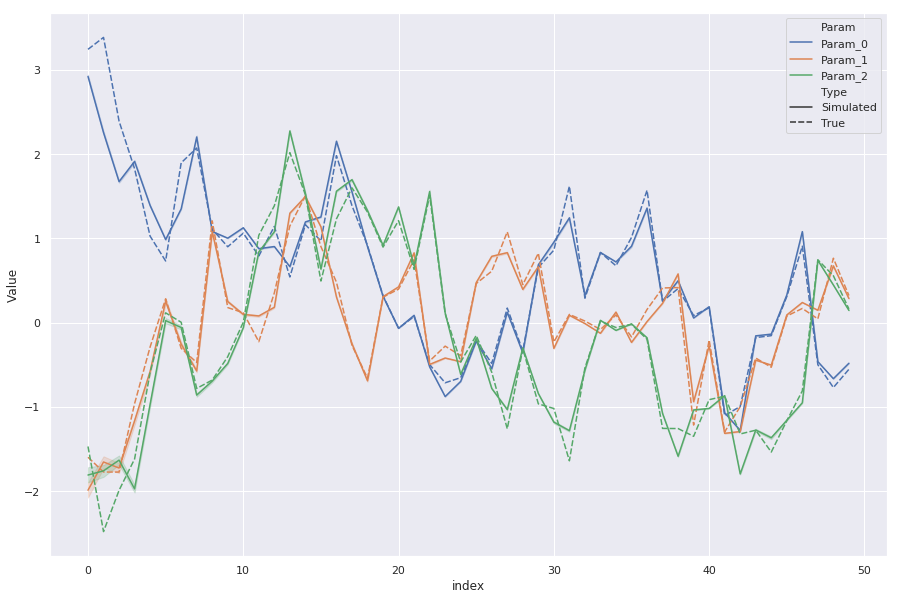

In [9]:
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)

plot_df = pd.concat([df, true_vals_df])
# Plot the responses for different events and regions
sns.lineplot(x="index", y='Value', hue='Param', data=plot_df, ax=ax, style='Type')